In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import utils
matplotlib.rcParams['figure.figsize'] = (0.89 * 12, 6)
matplotlib.rcParams['lines.linewidth'] = 10
matplotlib.rcParams['lines.markersize'] = 20

# The Dataset

$$y = x^3 + x^2 - 4x$$

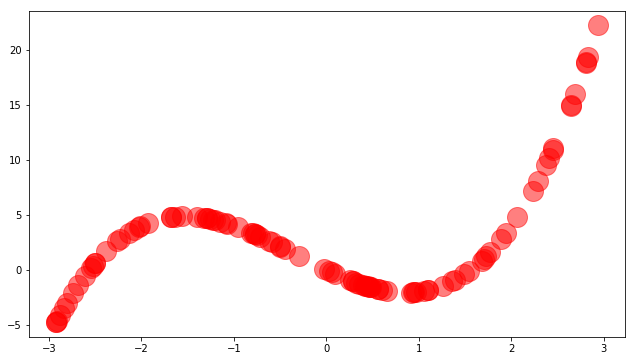

In [2]:
x, y, X, transform, scale = utils.get_base_data()
utils.plotter(x, y)

# The Dataset

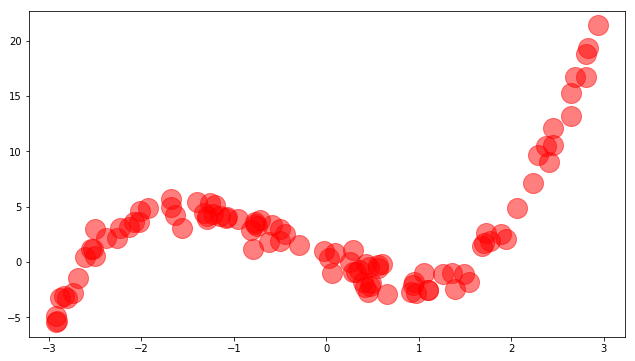

In [3]:
noise = utils.get_noise()
utils.plotter(x, y + noise)

# Machine Learning

$$
y = f(\mathbf{x}, \mathbf{w})
$$

$$
f(x, \mathbf{w}) = w_3 x^3 + w_2x^2 + w_1x + w_0
$$

$$
y = \mathbf{w} \cdot \mathbf{x}
$$

# Transforming Features

<center><img src="images/transform_features.png" style="height: 600px;"></img></center>

# Fitting Data with Scikit-Learn

<center><img src="images/sklearn.png"></img></center>

# Fitting Data with Scikit-Learn

Minimize
$$C(\mathbf{w}) = \sum_j (\mathbf{x}_j^T \mathbf{w} - y_j)^2$$

In [4]:
def mean_squared_error(X, y, fit_func):
    return ((fit_func(X).squeeze() - y.squeeze()) ** 2).mean()

# Fitting Data with Scikit-Learn

[[ -2.64636702e-16  -4.00000000e+00   1.00000000e+00   1.00000000e+00]]
1.1699340707e-29


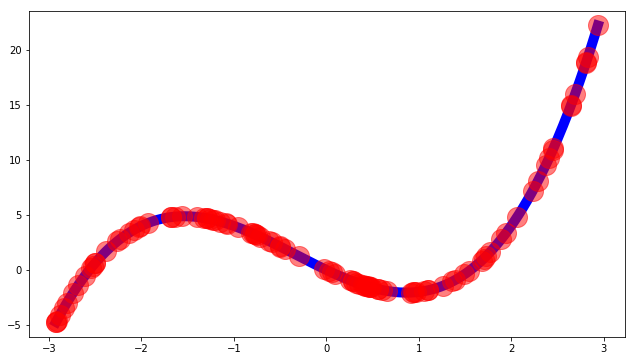

In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False).fit(X, y)
print(reg.coef_ / scale)
print(mean_squared_error(X, y, reg.predict))
utils.plotter(x, y, fit_fn=reg.predict, transform=transform)

# Fitting Data with Scikit-Learn

In [6]:
reg = LinearRegression(fit_intercept=False).fit(X, y + noise)
print(reg.coef_ / scale)
print(mean_squared_error(X, y + noise, reg.predict))

[[ 0.15581867 -3.95307439  0.96781294  0.98141471]]
0.745263495496


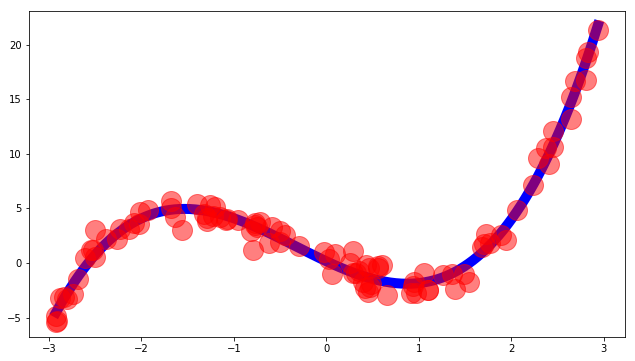

In [7]:
utils.plotter(x, y + noise, fit_fn=reg.predict, transform=transform)

# Exercise 1

# Fitting Data with Numpy

<center><img src="images/numpylogoicon.svg" style="height: 400px;"></img></center>

# Linear Algebra

<center><img src="images/linear_tweet.png" style="height: 400px;"></img></center>

# Linear Algebra!

$$X\mathbf{w} = \mathbf{y}$$

<center><img src="images/row_mult.png" style="height: 500px;"></img></center>

# Linear Algebra!

<center><img src="images/row_mult.png" style="height: 200px;"></img></center>



In [8]:
(X.dot(reg.coef_.T) == reg.predict(X)).all()

True

# Fitting Data with Numpy

$$X\mathbf{w} = \mathbf{y}$$

$$\mathbf{w} = X^{-1}\mathbf{y}$$

<center><img src="images/pete-4.jpg" style="height: 400px;"></img></center>

# Fitting Data with Numpy

$$X\mathbf{w} = \mathbf{y}$$

$$X^TX\mathbf{w} = X^T\mathbf{y}$$

$$\mathbf{w} = (X^TX)^{-1}X^T\mathbf{y}$$

# Orthogonal Projections!

$$P = X(X^TX)^{-1}X^T$$

Try to show $$P^2 = P$$
and that
$$(\mathbf{y} - P\mathbf{y})^T P\mathbf{y} = 0$$

<center><img src="images/pete-5.jpg" style="height: 350px;"></img></center>

# Fitting Data with Numpy

$$\mathbf{w} = (X^TX)^{-1}X^T\mathbf{y}$$

In [9]:
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y).T / scale

array([[ -6.41153797e-15,  -4.00000000e+00,   1.00000000e+00,
          1.00000000e+00]])

In [10]:
(np.linalg.inv(X.T @ X) @ X.T @ y).T / scale

array([[ -6.41153797e-15,  -4.00000000e+00,   1.00000000e+00,
          1.00000000e+00]])

In [11]:
np.linalg.pinv(X).dot(y).T / scale

array([[ -2.77555756e-15,  -4.00000000e+00,   1.00000000e+00,
          1.00000000e+00]])

# Fitting Data with Numpy

In [12]:
class NumpyLinearRegression(object):
    def fit(self, X, y):
        self.coef_ = np.linalg.pinv(X).dot(y)
        return self
    
    def predict(self, X):
        return X.dot(self.coef_)

# Fitting Data with Numpy

[[ -2.77555756e-15  -4.00000000e+00   1.00000000e+00   1.00000000e+00]]
2.4124924559e-29


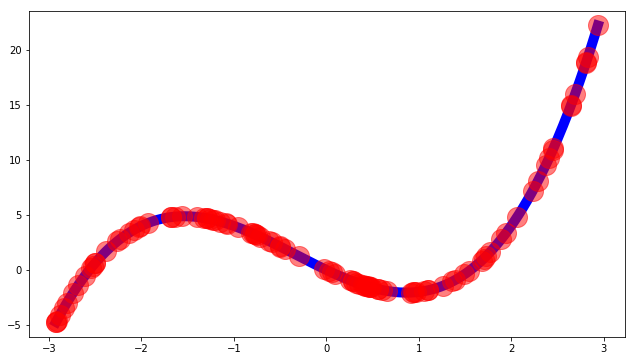

In [13]:
linalg_reg = NumpyLinearRegression().fit(X, y)
print(linalg_reg.coef_.T / scale)
print(mean_squared_error(X, y, linalg_reg.predict))
utils.plotter(x, y, fit_fn=linalg_reg.predict, transform=transform)

# Fitting Data with Numpy

[[ 0.15581867 -3.95307439  0.96781294  0.98141471]]
0.745263495496


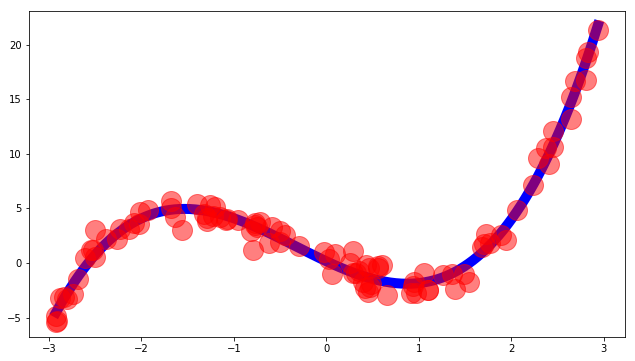

In [14]:
linalg_reg = NumpyLinearRegression().fit(X, y + noise)
print(linalg_reg.coef_.T / scale)
print(mean_squared_error(X, y + noise, linalg_reg.predict))
utils.plotter(x, y + noise, fit_fn=linalg_reg.predict, transform=transform)

# Exercise 2

# Regularization

In [15]:
x_train, x_test, y_train, y_test, X_train, X_test, transform, scale = utils.get_overfitting_data()

# What does overfitting look like?

[[  1.59200873e+00  -7.60118095e+00  -8.55885767e+00   2.03877305e+01
    2.23725091e+01  -1.88645676e+01  -1.69978333e+01   7.59424857e+00
    5.86217256e+00  -1.47480419e+00  -1.02051112e+00   1.36613965e-01
    8.74908226e-02  -4.83848018e-03  -2.93685343e-03]]


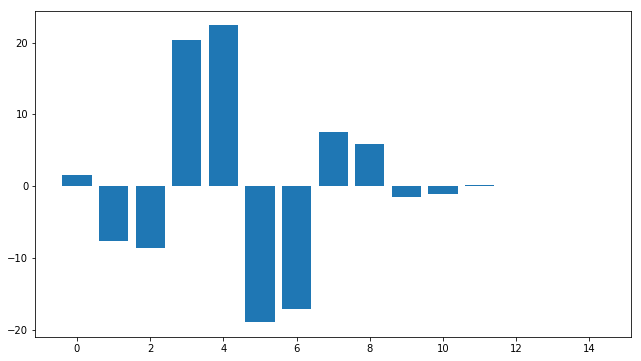

In [16]:
reg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
print((reg.coef_ / scale))
plt.bar(np.arange(len(reg.coef_.squeeze())), reg.coef_.squeeze() / scale);

# What does overfitting look like?

In [17]:
mean_squared_error(X_train, y_train, reg.predict)

0.26519644458424657

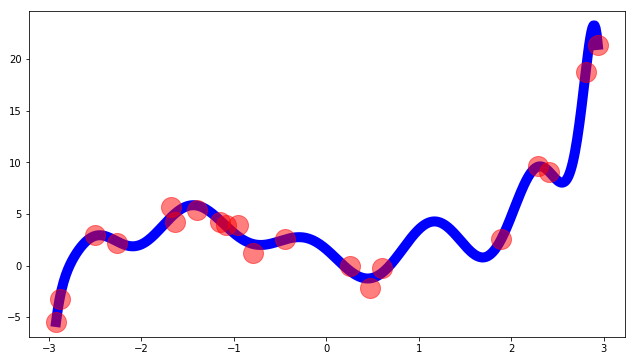

In [18]:
utils.plotter(x_train, y_train, fit_fn=reg.predict, transform=transform)

# What does overfitting look like?

In [19]:
mean_squared_error(X_test, y_test, reg.predict)

6.9205863224108786

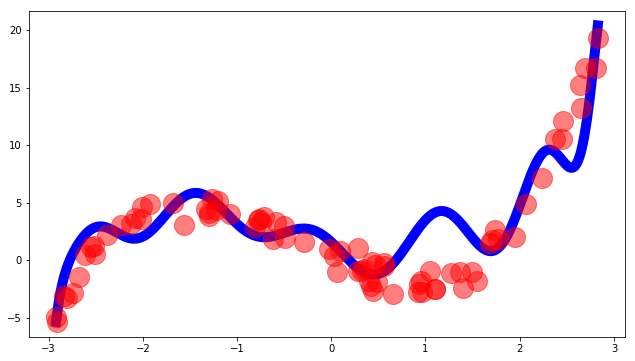

In [20]:
utils.plotter(x_test, y_test, fit_fn=reg.predict, transform=transform)

# Ridge Regression

## "Penalize model complexity"

$$C(\mathbf{w}) = \sum_j (\mathbf{x}_j^T \mathbf{w} - y_j)^2$$

$$C(\mathbf{w}) = \sum_j (\mathbf{x}_j^T \mathbf{w} - y_j)^2 + \alpha \sum_j w_j^2$$

# Ridge Regression

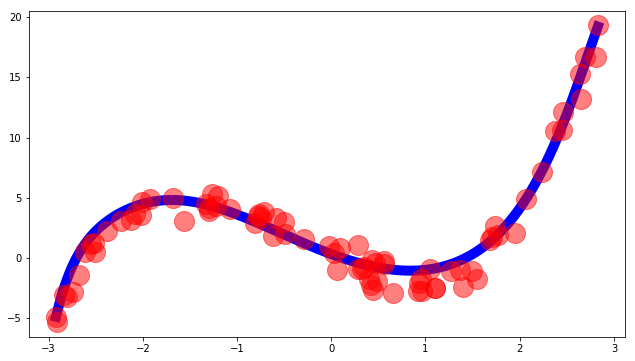

In [21]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.02).fit(X_train, y_train)
utils.plotter(x_test, y_test, fit_fn=ridge_reg.predict, transform=transform)

# Ridge Regression

1.09879320432


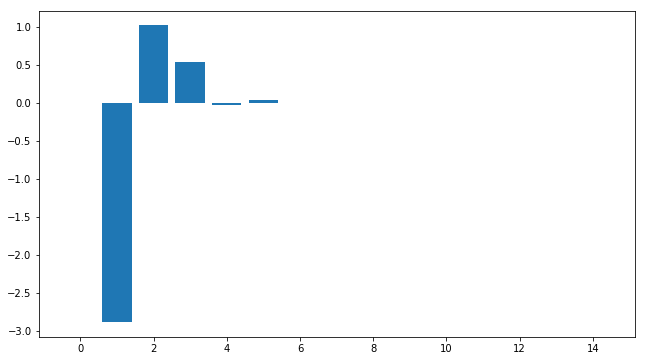

In [22]:
print(mean_squared_error(X_test, y_test, ridge_reg.predict))
plt.bar(np.arange(len(ridge_reg.coef_.squeeze())), ridge_reg.coef_.squeeze() / scale);

# Lasso Regression

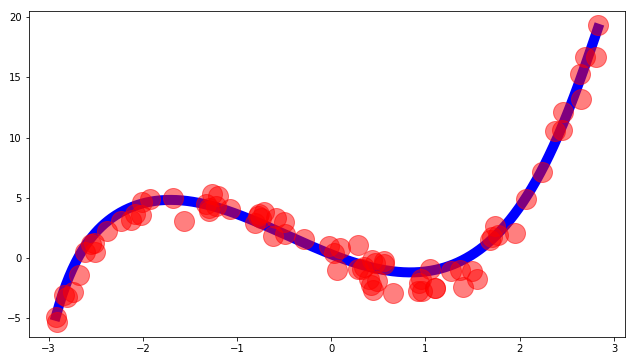

In [23]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.005, max_iter=100000, fit_intercept=False).fit(X_train, y_train)
utils.plotter(x_test, y_test, fit_fn=lasso_reg.predict, transform=transform)

# Lasso Regression

0.994085242188


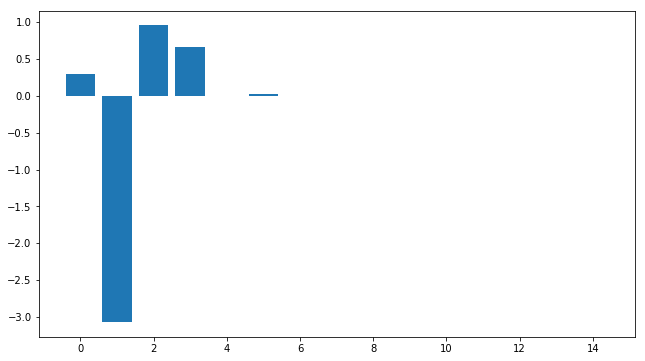

In [24]:
print(mean_squared_error(X_test, y_test, lasso_reg.predict))
plt.bar(np.arange(len(lasso_reg.coef_)), lasso_reg.coef_ / scale);

# Exercise 3